# Mise en pratique [regression linéaire]

A partir d'un jeu de données nous allons essayer de modéliser un loyer à partir de la surface d'un appartement

La question qu'on essaie de résoudre est :
Étant donné les caractéristiques de mon appartement, combien devrais-je normalement payer mon loyer ?

## 1. Importation des données et configuration du data set

In [4]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
df = pd.read_csv('data.csv')

## 2. Nettoyage des données

In [14]:
round(df.describe())

,loyer,surface
count,545.0,545.0
mean,2308.0,63.0
std,2201.0,49.0
min,488.0,11.0
25%,1255.0,32.0
50%,1795.0,50.0
75%,2600.0,76.0
max,25000.0,415.0


In [7]:
print("Nombre de lignes dupliquées")
print(df.duplicated().value_counts())
print("\n" + "Nombre de valeurs manquantes")
print(df.isnull().sum()) 

Nombre de lignes dupliquées
False    482
True      63
dtype: int64

Nombre de valeurs manquantes
loyer      0
surface    0
dtype: int64


Le jeu de données étant propre, je peux passer à l'étape suivante

## 3. Exploration des données

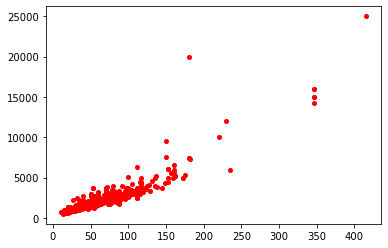

In [8]:
# On affiche le nuage de points dont on dispose
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
plt.show()


## 4. Choix du modèle de machine learning

Clairement, d'après la visualisation, on peut se dire que le montant du loyer dépend de manière linéaire de la surface du logement. On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite. 

## 5. Préparation des données

### 5.a échantillonage

In [ ]:
# Le jeu de données étant petit il n'est pas nécessaire de réaliser l'apprentissage sur un échantillon

#df.sample(n=10000)

### 5.b Sélection de la variable cible et des variables à explicatives

On peut voir que lorsque la surface devient un peu trop grande, les données semblent devenir moins modélisables facilement, il y a plus de variabilité. On va considérer pour l'instant résoudre le problème de prédiction pour les loyers inférieurs à 10,000€, afin de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.


In [15]:
df = df[df['loyer'] < 10000]

On définit à présent notre variable cible

In [16]:
y = df.loyer

Ainsi que nos variables explicatives (qui est ici unique)

In [17]:
X = df[["surface"]]

## 6. Division du jeu de données en training/validation/testing sets

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

## 8. Apprentissage sur le training set

#### On implémente la regression linéaire

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

#### On obtient ainsi les parmètres β1 et β0 de notre modèle

In [54]:

print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

print("\n")

print("On comprend donc que tout appartement parisien coute {} € auquel il faut ajouter {} € par mètre carré"
     .format(round(regr.intercept_),round(regr.coef_[0],2)))

Le coefficient β1 est égal à 29.77 tandis que l'intercept β0 est égal à 308


On comprend donc que tout appartement parisien coute 308 € auquel il faut ajouter 29.77 € par mètre carré


#### On peut à présent réaliser des prédictions

In [55]:
x_to_predict = 25
x_df =  pd.DataFrame({'surface': [x_to_predict]})

print("Selon le modèle, un {} m2 à Paris doit avoir un loyer de {} €"
      .format(x_to_predict, round(regr.predict(x_df)[0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, un 25 m2 à Paris doit avoir un loyer de 1052 €


On remarque que 25 * 29.77 + 308 = 1052.25


#### enfin on peut représenter notre modèle linéaire

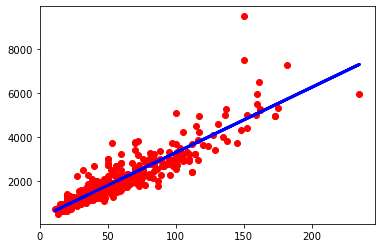

In [63]:
ytrainpred = regr.predict(xtrain)


# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)

plt.show()

## 8. Evaluation du modèle sur le testing set

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

#### évaluation à partir du R2

In [69]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))



Pour les données d'entrainement le R2 vaut 0.822 alors que pour les données de test, il est de 0.828


Le coefficient de détermination R2 est proche de 1 , le modèle de regression linéaire est donc bon. De plus les R2 des jeux d'entrainement et de test sont proche, le modèle est donc robuste.

#### évaluation à partir du RMSE

In [70]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 494.284 alors que pour les données de test, il est de 560.274


A nouveau on remarque qu'il y a peu de perte entre les deux modèles

#### évaluation graphique

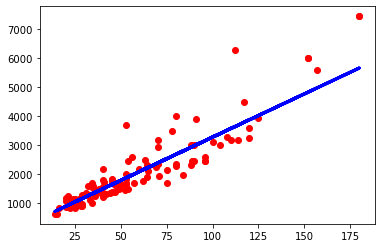

In [71]:
# Plot outputs
plt.scatter(xtest, ytest,  color='red')
plt.plot(xtest, ytestpred, color='blue', linewidth=3)

plt.show()

La droite correspond également bien au nuage de points de l'échantillon de test

Remarque: Les résultats peuvent être meilleurs pour l'échantillon de test que dans celui de train, ce résultat est assez exeptionnel et est due au fait que l'aléa à classer dans l'échantillon de train des données fortement équartée du nuage de point, ainsi ces quelques données suffisent à dégrader le R2 de l'échantillon d'entrainement.